### Homework 3
### Dimensionality Reduction and Clustering

-----------


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Do not import any other libraries. You can add libraries only for visualizations.

from kmeans import KMeans

### K-Means Clustering
* Fill the functions from kmeans.py
* Use the below cells to validate your implementations for each function using simple inputs. **Do not change the cells.** These cells are given to make sure you wrote all the functions correctly before creating the K-Means model.

In [2]:
n_clusters = 3

In [3]:
# Validate the function "mean"
data = np.array([[1.1, 1, 1, 0.5], [4, 3.14, 2, 1], [0, 0, 0, 0]])
km = KMeans(data, n_clusters)
print(km.mean(data))

[1.7, 1.3800000000000001, 1.0, 0.5]


In [4]:
# Validate the function "std"
print(km.std())

[1.687206764645835, 1.309758247413112, 0.816496580927726, 0.408248290463863]


In [5]:
# Validate the function "standard_scaler"
print(km.standard_scaler())

[[-0.35561735 -0.29012988  0.          0.        ]
 [ 1.36319984  1.34375943  1.22474487  1.22474487]
 [-1.00758249 -1.05362956 -1.22474487 -1.22474487]]


In [6]:
# Validate the function "euclidean_distance"
print(km.euclidean_distance(data[0], data[1]))

3.7735394525564456


In [7]:
# Validate the function "get_closest_centroid"
km.centroids = [[1, 1, 1, 1],[2, 2, 2, 2]]
print(km.get_closest_centroid(data[0]))

0


In [8]:
# Validate the function "update_clusters"
km.X = [[1.1, 1, 1, 1.2], [4, 2, 2, 1.5], [0, 0, 0, 0]]
km.centroids = [[1, 1, 1, 1], [2, 2, 2, 2], [6, 6, 6, 6]]
print(km.update_clusters())

{'0': [[1.1, 1, 1, 1.2], [0, 0, 0, 0]], '1': [[4, 2, 2, 1.5]], '2': []}


In [9]:
km.update_centroids(km.update_clusters())
print(km.centroids)

[[0.55 0.5  0.5  0.6 ]
 [4.   2.   2.   1.5 ]
 [6.   6.   6.   6.  ]]


In [10]:
c1 = {0: [[1.1, 1], [0, 0]],
                    1: [[4, 2]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

c1 = {0: [[1.1, 1], [0, 2]],
                    1: [[6, 7]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

True
False


### Dimensionality Reduction using PCA
* **TODO**: Fill the below function called pca.
* Do not use libraries other than numpy.

In [11]:
def pca(X, n_components):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    :param X: Input data matrix of shape (n_samples, n_features)
    :param n_components: Number of principal components to keep
    :return: Transformed data matrix of shape (n_samples, n_components)
    """
    #Calculate mean
    mean = np.mean(X, axis=0)
    
    #Center the data 
    centered_X = X - mean
    
    #Calculate covairance matrix
    cov_matrix = np.cov(centered_X, rowvar=False)
    
    #Perform eigen decomposition
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
    
    #Sort eigenvectors in descending order (we don't use eigenvalues)
    sorted = np.argsort(eig_vals)[::-1]
    sorted_vecs = eig_vecs[:, sorted]
    
    #Select the top n_components eigenvectors
    top_eig_vecs = sorted_vecs[:, :n_components]
    
    #Project the data on the top eigenvectors
    transformed_X = np.dot(centered_X, top_eig_vecs)
    
    return transformed_X


### Fit K-Means Clustering
* Fill the "fit" function in kmeans.py and run the K-Means Clustering.
* Run the model with different *k* values.
    * *k* = 3, 5, 7, 9
* Save the results (clusters, centroids)
* Use MNIST-1D dataset. 

In [12]:
# Load the dataset

from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

print(data['x'].shape)
X = data['x']

(4000, 40)


In [13]:
X = pca(X, 2)

In [14]:
km_3 = KMeans(X, 3)
clusters_3, centroids_3, wcss_3 = km_3.fit()

Number of steps: 21


In [15]:
km_5 = KMeans(X, 5)
clusters_5, centroids_5, wcss_5 = km_5.fit()

Number of steps: 27


In [16]:
km_7 = KMeans(X, 7)
clusters_7, centroids_7, wcss_7 = km_7.fit()

Number of steps: 46


In [17]:
km_9 = KMeans(X, 9)
clusters_9, centroids_9, wcss_9 = km_9.fit()

Number of steps: 29


In [18]:
km_11 = KMeans(X, 11)
clusters_11, centroids_11, wcss_11 = km_11.fit()

Number of steps: 51


In [19]:
km_13 = KMeans(X, 13)
clusters_13, centroids_13, wcss_13 = km_13.fit()

Number of steps: 23


## Visualization
* **TODO**: Plot the clusters for each cluster where *k*= 3, 5, 7, 9, 11, 13.
* You can check the example plot, which shows three clusters on a different dataset.
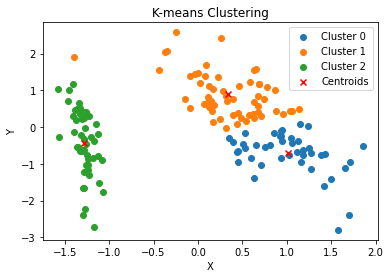

In [61]:
def print_clusters(clusters, centroids):
    """
    Plot the data points according to their clusters.
    The data points within the same clusters should have the same color. 
    Otherwise they should have different colors.
    Don't forget to mark the cluster centroids
    
    :params: clusters
    :params: centroids
    """
    #Cluster labels and data points
    labels = list(clusters.keys())
    data_points = list(clusters.values())
    
    #Plotting data points
    for label, points in zip(labels, data_points):
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {int(label) + 1}") #I added 1 to start it from 1
        
    #Plotting centroids
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", color = "black", label='Centroids')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Clusters Visualization")
    plt.legend()
    plt.show()

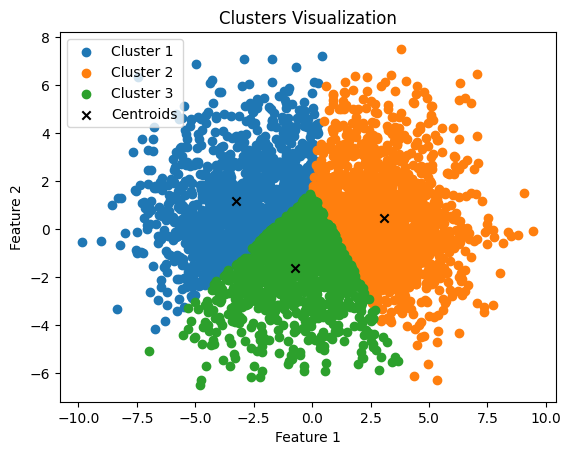

In [62]:
print_clusters(clusters_3, centroids_3)

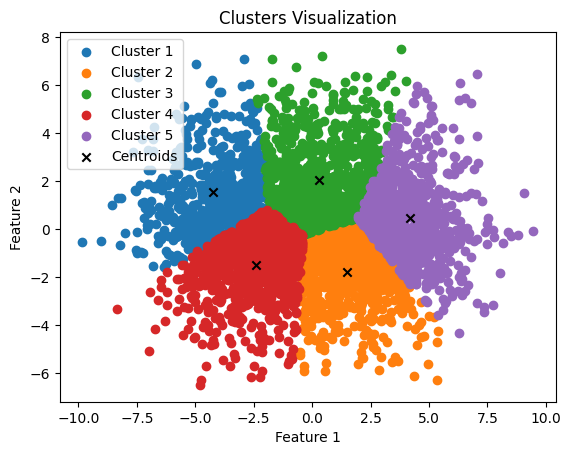

In [63]:
print_clusters(clusters_5, centroids_5)

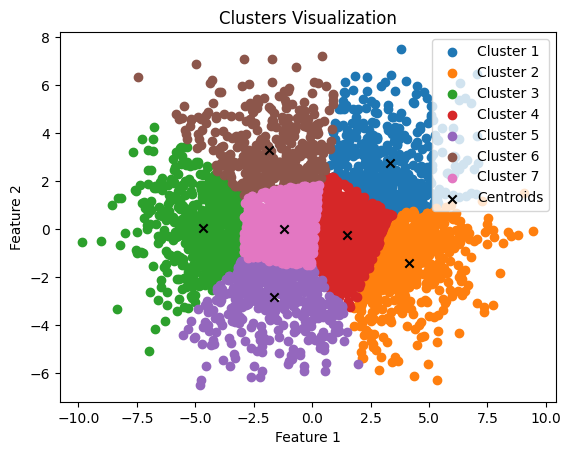

In [64]:
print_clusters(clusters_7, centroids_7)

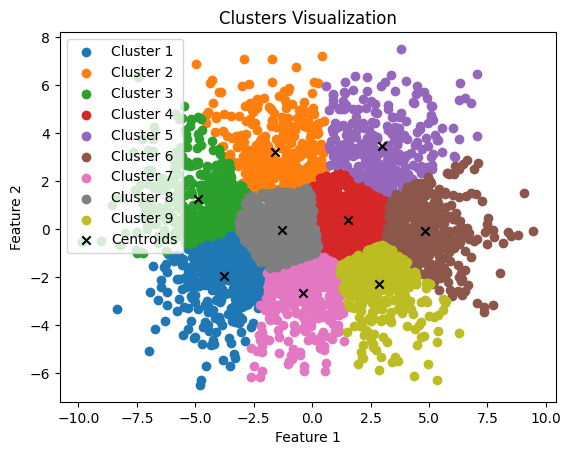

In [65]:
print_clusters(clusters_9, centroids_9)

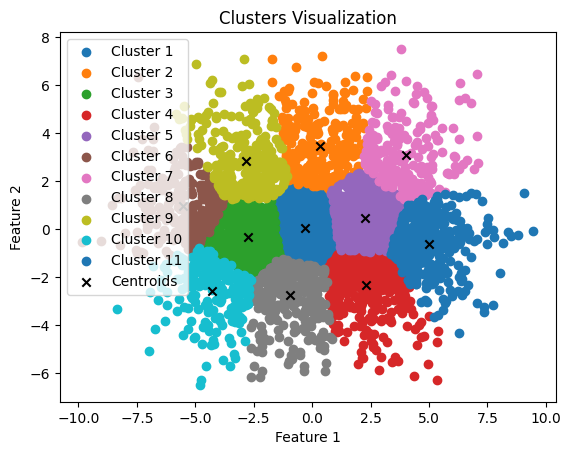

In [69]:
print_clusters(clusters_11,centroids_11) 

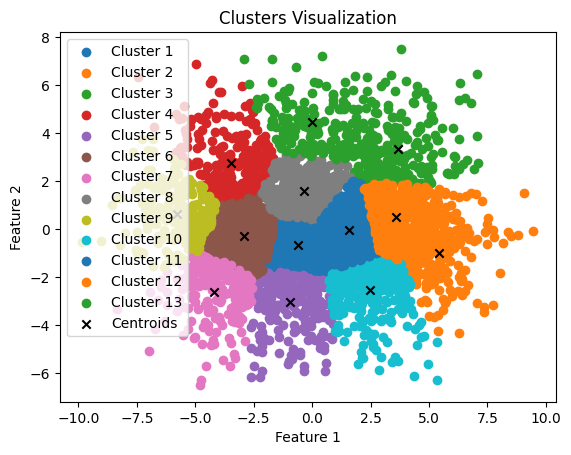

In [70]:
print_clusters(clusters_13, centroids_13)

## WCSS
* Obtain Within-Cluster Sum of Squares (WCSS) with different *k* values.
* Plot the results.
* Explain why WCSS can be used. What does the result mean to us? How can we decide the best *k* value. Interpret the plot. Write your comments.

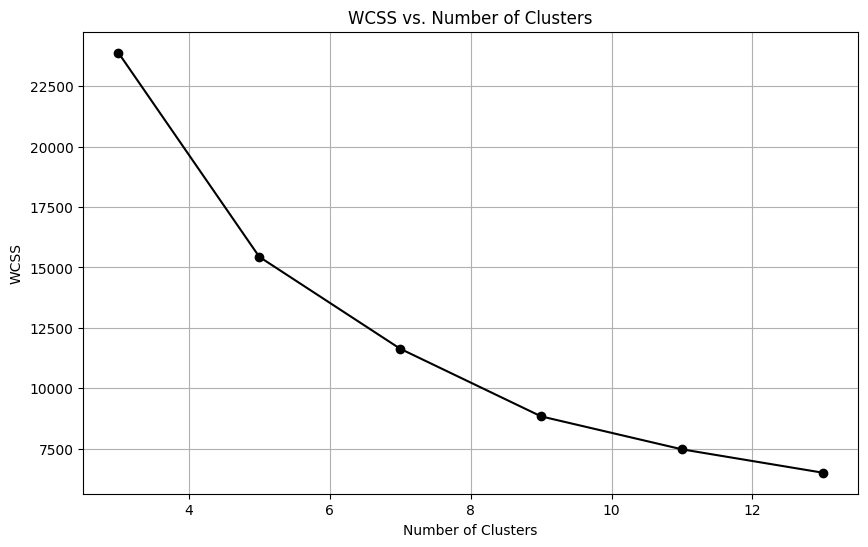

In [72]:
wcss_values = [wcss_3, wcss_5, wcss_7, wcss_9, wcss_11, wcss_13]
k_values = [3, 5, 7, 9, 11, 13]

def plot_wcss(wcss_values, k_values):
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss_values, marker='o', color='black')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title("WCSS vs. Number of Clusters")
    plt.grid(True)
    plt.show()

plot_wcss(wcss_values, k_values)

Write your comments here:

In [ ]:
#WCSS used to evaluate the performance of clustering performance this is a measure of how homogenous the clustering results are. WCSS is calculated for different k values and the results are often used to select a value for k. By changing of wcss with the k value, we can determine most suitable k. as k increases WCSS decreases.
#We can select the most appropriate k value at the elbow point where WCSS starts decreasing then the rate of decrease slows down.